# Midterm Exam - MLC Fall 2024

Total points for the midterm exam: 15. More detailed instructions are in the PDF file in Brightspace.

Please note: Copying and pasting other people's work is absolutely prohibited. Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

## Part A - Ensemble Methods (40%)

### Task 1: Create and Visualize Decision Trees (10%)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

The provided **Telecom dataset** encompasses diverse parameters associated with telecom customers and aims to predict whether a customer is likely to stay (Contract Closure = 0) or leave (Contract Closure = 1) the telecom service provider. Each row represents a customer, and the columns include various features such state, total miutes of usage internet service, and more. The target variable, "Contract Closure," serves as the binary indicator for customer churn prediction, with 0 indicating the customer stays and 1 indicating the customer leaves the telecom service.

In [ ]:
# Load the dataset
data = pd.read_csv("telecom_dataset.csv")
data=data.dropna()

In [ ]:
# Split the dataset into features (x) and target variable (y)
X = data.drop("Contract Closure", axis=1)
y = data["Contract Closure"]

In [ ]:
# Split data into 80% train, 20% test, random_state=999
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=999)

# Print head
print(X_train.head())

      State_FIPS  Account length  Area code  Number vmail messages  \
1193          27             173        510                      0   
2512          56              57        408                     39   
2383          51             138        415                      0   
1743          38              82        415                     29   
1396          32             130        510                      0   

      Total day minutes  Total day calls  Total day charge  Total eve minutes  \
1193              291.8              143             49.61              214.3   
2512              213.0              115             36.21              191.1   
2383              251.0              119             42.67               91.2   
1743              163.8               77             27.85              134.9   
1396              154.2              119             26.21              110.2   

      Total eve calls  Total eve charge  Total night minutes  \
1193              134       

#### a. Evaluate the model. Report on in-sample (training data) and out-of-sample (test data).

In [ ]:
# your answer here

In [ ]:
# Build the decision tree model with max_depth = 2
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)

# in sample accuracy
print('In sample accuracy:',model.score(X_train,y_train))

# out of sample accuracy
print('Out of sample accuracy:',model.score(X_test,y_test))

In sample accuracy: 0.8792434529582929
Out of sample accuracy: 0.8662790697674418


In [ ]:
# Make predictions on the test set

# your code here

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

#### b. Visualize the decision tree.

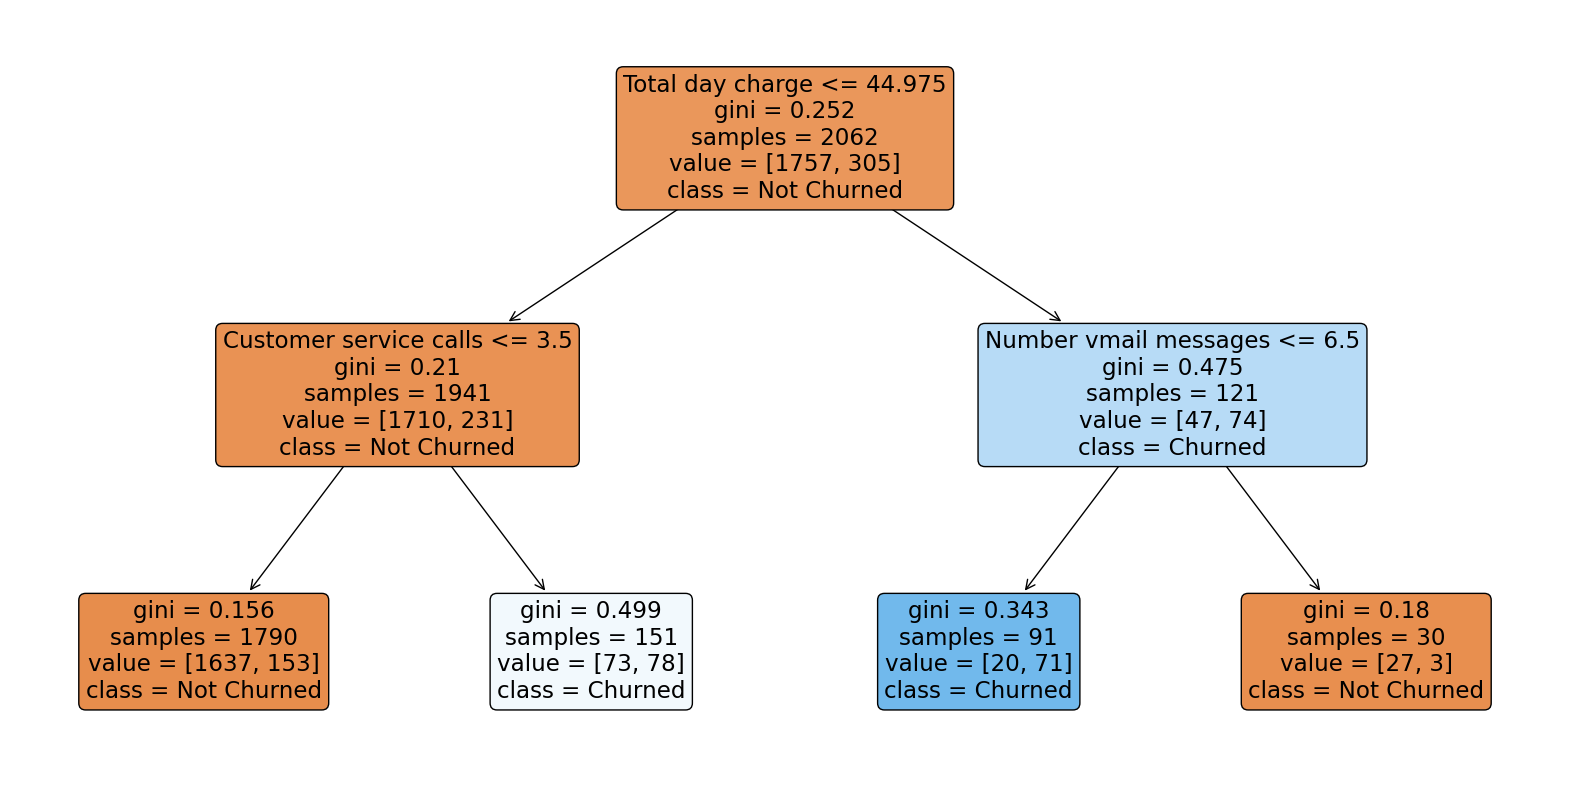

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Churned', 'Churned'], rounded=True)
plt.show()

#### c. List the top 5 most important features in order.

In [ ]:
# your code here

In [ ]:
# list the top 5 most important features in order
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display the top 5 feature importance scores
top_5_features = feature_importance_df.head(5)
print("\nTop 5 Feature Importance Scores:")
print(top_5_features)


Top 5 Feature Importance Scores:
                   Feature  Importance
6         Total day charge    0.432110
16  Customer service calls    0.404648
3    Number vmail messages    0.163242
10     Total night minutes    0.000000
15       Total intl charge    0.000000


### Task 2: Ensemble Method Implementation (30%)

The goal of this task is to implement a **bagging and a boosting model** . Evaluate their performance on your dataset, providing insights into the differences in their error metrics, and discuss why one might outperform the other in this context.

In [ ]:
# Suggested steps:
# 1) Split the data into training and testing sets, ensuring to respect the time series nature if applicable.
# 2) Implement a Bagging Regressor and a Gradient Boosting Regressor.
# 3) Evaluate both models using appropriate metrics for your problem.
# 4) Provide a comparative analysis of their performances.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

The **AAPL, V, and GOOG datasets** consists of stock quotes companies, where the "Adj Close" price serves as the target variable, reflecting the adjusted closing price of Apple's stock over a specific period.

In [ ]:
import pandas as pd
import os

# Define the path to the folder and the file names - change if needed
folder_path = 'Data'
file_names = ['AAPL.csv', 'V.csv', 'GOOG.csv']

# Function to load a CSV, transform the 'Dt' column, and set it as the index
def load_and_transform(file_path):
    df = pd.read_csv(file_path)
    df['Dt'] = pd.to_datetime(df['Dt'])
    df.set_index('Dt', inplace=True)
    return df

# Load all dataframes with the date transformations
dataframes = {name.split('.')[0]: load_and_transform(os.path.join(folder_path, name)) for name in file_names}

# Perform a series of left joins to combine the dataframes on their index
df = dataframes['AAPL']
for df_name in ['V', 'GOOG']:
    df = df.join(dataframes[df_name], how='left', lsuffix='_AAPL', rsuffix=f'_{df_name}')

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Data/AAPL.csv'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Assuming 'df' is your DataFrame and 'Adj Close_AAPL' is the target variable
X = df.drop('Adj Close_AAPL', axis=1)
y = df['Adj Close_AAPL']

# fill NA
X = X.fillna(0)

# Data Splitting, considering its temporal nature
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#### a. Train and test Bagging Model.

In [ ]:
bagging_model = BaggingRegressor()
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

#### b. Train and test Boosting Model.

In [ ]:
boosting_model = GradientBoostingRegressor()
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)

#### c. Evaluate the model and report (use Mean squared error; Mean absolute error; and R2).  

In [ ]:
# Model Evaluation using more metrics
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

mse_boosting = mean_squared_error(y_test, y_pred_boosting)
mae_boosting = mean_absolute_error(y_test, y_pred_boosting)
r2_boosting = r2_score(y_test, y_pred_boosting)


# Printing out the performance metrics with explanations
print("Bagging Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_bagging:.2f} - The average of the squares of the errors or deviations.")
print(f"Mean Absolute Error (MAE): {mae_bagging:.2f} - The average of the absolute errors.")
print(f"R-squared (R2): {r2_bagging:.2f} - The proportion of the variance in the dependent variable that is predictable from the independent variables.\n")

print("Gradient Boosting Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_boosting:.2f} - The average of the squares of the errors or deviations.")
print(f"Mean Absolute Error (MAE): {mae_boosting:.2f} - The average of the absolute errors.")
print(f"R-squared (R2): {r2_boosting:.2f} - The proportion of the variance in the dependent variable that is predictable from the independent variables.")

#### d. Hyperparameter Tuning and Model Optimization.  

In [ ]:
# Possible Steps:
# 1) Choose an ensemble model for hyperparameter tuning (one with the best performance in a previous step).
# 2) Define a parameter grid to explore.
# 3) Use GridSearchCV to find the optimal parameters.
# 4) Retrain the model using the best parameters and evaluate its performance.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Model Selection
# Choose the model you wish to tune
model_to_tune = GradientBoostingRegressor()

# Parameter Grid
# Define a comprehensive grid of parameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
 #   'min_samples_split': [2, 4],
 #   'min_samples_leaf': [1, 2],
  #  'max_features': [None, 'sqrt', 'log2'],
  #  'subsample': [0.8, 0.9, 1.0]
}

# Grid Search
# Perform grid search and identify the best parameters
grid_search = GridSearchCV(model_to_tune, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Model Retraining and Evaluation
# Retrain the model with the best parameters and evaluate its performance
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)

# Output the performance metrics
print('Best Model R2 score:', r2_best)
print('Best Parameters:', best_params)

#### e. Conceptual Questions
- Describe the trade-offs between bias and variance when using ensemble methods.
- How does increasing the diversity of models in an ensemble affect its performance?
- Discuss the implications of temporal dependencies in time series data on the choice and performance of ensemble methods.

In [ ]:
# your answer to questions here

When using ensemble methods, the trade-off between bias and variance is a balancing act. Bias is the error due to overly simplistic assumptions in the learning algorithm. In contrast, variance is the error due to too much complexity in the learning algorithm. Ensemble methods typically reduce variance more than bias. For instance, bagging reduces variance without increasing bias, while boosting can reduce bias without incurring high variance if tuned carefully.

Increasing the diversity of models in an ensemble generally improves performance by reducing the likelihood that all models will make the same error on a given data point. This can lead to better generalization and a more robust model overall. However, too much diversity might also mean including weaker or inappropriate models, which can reduce the ensemble's effectiveness.

Temporal dependencies in time series data complicate the performance of ensemble methods because these dependencies violate the typical assumption that the observations are independent. The performance can suffer if the ensemble method does not account for these dependencies, as it might make predictions based on spurious correlations. It's crucial to use models that can capture temporal dynamics, like time-lagged features, to maintain the ensemble's performance on time series data.

## Part B - Support Vector Machines (30%)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

### Task 1: SVM Decision Boundaries and C Parameter Investigation (15%)

**The Iris dataset** is a classic in the field of machine learning and statistics, introduced by the British statistician and biologist Ronald Fisher in 1936. The dataset consists of 150 samples from three species of Iris flowers: Iris setosa, Iris versicolor, and Iris virginica. Each sample is described by four features: the length and the width of the sepals and petals, in centimeters. See [wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization
y = iris.target


# In the first task, we will consider only 2 classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset (two classes)')
plt.show()

#### a. Consider the dataset above. Based on the visual inspection of the plot provided, how would you train an SVM model for this dataset? Explain your choice of kernel and parameters.

In [ ]:
# your answer here

Answer: Given the plot, the dataset appears to be linearly separable. Therefore, I would train a linear SVM with a high value of C (e.g., C=100000) to emphasize that no slack variables are allowed and to ensure a hard margin. This choice is based on the visual inspection of the data, which suggests that a linear decision boundary would be sufficient to separate the two classes.

**Assuming you chose to train a linear SVM with C=100000; answer the following five questions:**

#### b. Report the separating hyperplane.

In [ ]:
# your answer here

In [ ]:
# Train a linear SVM
clf = SVC(kernel='linear', C=100000)
clf.fit(X, y)


# b. Report the separating hyperplane
w = clf.coef_[0] # Get the coefficients

a = -w[0] / w[1] # Slope of the line.
b = -(clf.intercept_[0]) / w[1] # Intercept of the line.

print("The separating hyperplane (line) is: y = {:.3} x + {:.3}".format(a,b)) # minus sign,and devide w[1]

# It is also okay if you have a line like this one (or a scaled but equivalent line):
print("Alternative answer: {:.3}x + {:.3}y + {:.3} = 0".format(w[0],w[1],clf.intercept_[0]))

#### c. List the support vectors.

In [ ]:
# your answer here

In [ ]:
print(f'Support vectors:\n{clf.support_vectors_}')

#### d. Calculate the upper and lower hyperplanes (lines) of the margin

In [ ]:
# your answer here

In [ ]:
# d. Calculate the upper and lower hyperplanes (lines) of the margin
b = clf.support_vectors_[0]
print ("The lower hyperplane is: y = {:.3} x + {:.3}".format(a,(b[1] - a * b[0])))

b = clf.support_vectors_[2]
print ("The upper hyperpane is: y = {:.3} x + {:.3}".format(a,(b[1] - a * b[0])))

#### e. Compute the width of the margin

In [ ]:
# your answer here

In [ ]:
# Distance between the separating hyperplane and upper (or lower) hyperplane:
print(1/(np.sqrt(w[0]**2+w[1]**2)))

# We will also give full credit for:
# Distance between the upper and lower hyperplanes:
print(2/(np.sqrt(w[0]**2+w[1]**2)))

#### f. Using the provided SVM model with a high value of C (e.g., C=100000), plot the decision boundaries and margins. Then, adjust the SVM model by setting a very small value for the constant C (e.g., C=0.01). How do you expect this change to affect the margin width? Plot the new decision boundaries and margins and compare them to the previous plot to validate your expectations. Interpret the results

In [ ]:
# Suggested steps:
# 1) Train a linear SVM with a large C value (optional if you already did)
# 2) Plot the decision boundaries and margins
# 3) Now train another linear SVM with a small C value
# 4) Plot the new decision boundaries and margins

# your code here

# Train a linear SVM with a large C value (optional since we already did)
clf = SVC(kernel='linear', C=100000)
clf.fit(X, y)

In [ ]:
# Change the form of X to numpy array
X=np.array(X)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1)  # Covering the range of the data
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.gca()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired,s=100)
plt.axis('tight')
plt.show()

In [ ]:
# Now train another linear SVM with a small C value (they need to show this)
clf = SVC(kernel='linear', C=0.01)
clf.fit(X, y)


In [ ]:
# Change the form of X to numpy array
X=np.array(X)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1)  # Covering the range of the data
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.gca()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired,s=100)
plt.axis('tight')
plt.show()

In [ ]:
# your answer to questions here

### Task 2: Training using SVM (15%)

In [ ]:
# Load Iris dataset
iris = load_iris(as_frame=True)
df = iris.frame
X = df[['sepal length (cm)','petal width (cm)']].values  # Select the first two features for visualization purposes
y = df.target

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset (all classes)')
plt.show()

#### a. Train a linear SVM and a non-linear SVM with RBF kernel using the training set. Use the default arguments, make predictions and calculate accuracy on test set.

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
# Standardize the data

#your code here
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train a linear SVM

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

In [ ]:
# Train a non-linear SVM with RBF kernel

#rbf_svc = ...
#rbf_svc.fit(...)

rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

In [ ]:
# Make predictions and calculate accuracy on test (out-of-sample) set

#your code here

# Make predictions and calculate accuracy on test set
y_pred_linear = linear_svc.predict(X_test)
y_pred_rbf = rbf_svc.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Non-linear SVM (RBF kernel) Accuracy:", accuracy_score(y_test, y_pred_rbf))


In [ ]:
# Plot decision boundaries

def plot_decision_boundary(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(linear_svc, X_train, y_train, "Linear SVM")
plt.subplot(1, 2, 2)
plot_decision_boundary(rbf_svc, X_train, y_train, "Non-linear SVM (RBF kernel)")
plt.show()

#### b. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [ ]:
# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
#your code here

clf = SVC(kernel='poly')
clf.fit(X_train, Y_train)

# Report IS and OS results.
correct_IS=1.0*(clf.predict(X_train)==np.asarray(Y_train)).sum()/len(Y_train)
correct_OS=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)

print("In sample, we successfully predict {:.4} percent of the data".format((correct_IS)*100))
print("Out of sample, we successfully predict {:.4} percent of the data".format((correct_OS)*100))

#### c. Try polynomials of degree 1,2,3,4,5. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below. Plot the graph of "Accuracy vs log(C)" for each degree.

In [ ]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset.
# Denote the remaining training data by (X_train_1, Y_train_1).

X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, y_train, test_size=0.33, random_state=1)

In [ ]:
#your code here

In [ ]:
for degree in range(1,6):
    print("for degree={}:".format(degree))
    C=[np.exp(i) for i in np.linspace(-10,2*degree,200)]  # When degree increases, we could use a larger value of C.
    OS_validation=[]
    for c in C:
        clf = SVC(kernel='poly',C=c,degree=degree)
        clf.fit(X_train_1, Y_train_1)
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
        OS_validation.append(correct)
    temp=pd.DataFrame([C,OS_validation]).T
    ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])//2
    C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]
    print("When C_opt={}, we get max accuracy: {}".format(C_opt,temp.iloc[:,1].max()))

    C=[np.log(y) for y in C] # for a better graph
    plt.gca()
    plt.plot(C,OS_validation,'b',)
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.show()

In [ ]:
poly_svc = ...
poly_svc.fit(...)

In [ ]:
poly_svc = SVC(kernel='poly',C=12051.988241748213,degree=5)
poly_svc.fit(X_train, Y_train)

#Report OS result:
correct_OS=1.0*(poly_svc.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print("On the held-out test data, we successfully predict {:.4} percent of the data.".format((correct_OS)*100))

In [ ]:
#Report OS result

#your code here

In [ ]:
# Plot decision boundary for polynomial SVM using the function


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='plasma')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='plasma')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Classification using Non-linear Kernel SVM')
plt.show()

## Part C - Hierarchical and K-Means Clustering (30%)

### Task - Implement and compare hierarchical clustering and K-Means clustering.

For hierarchical and K-Means clustering, use the **Mall Customer Segmentation Data** from Kaggle. For leader clustering, simulate streaming data or use a large dataset divided into chunks to mimic streaming data, such as transaction data or sensor data streams.

In [15]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')

In [16]:
# Start from selecting relevant features for clustering
# We will be working with two features: 'Annual Income (k$)' and 'Spending Score (1-100)'

#your code here
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#### a.  Implement K-Means algorithm (10%)

In [18]:
# Implement K-Means

#your code here
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37265.86520484346, 30227.606513152008, 25044.967764018933, 21818.114588452176]


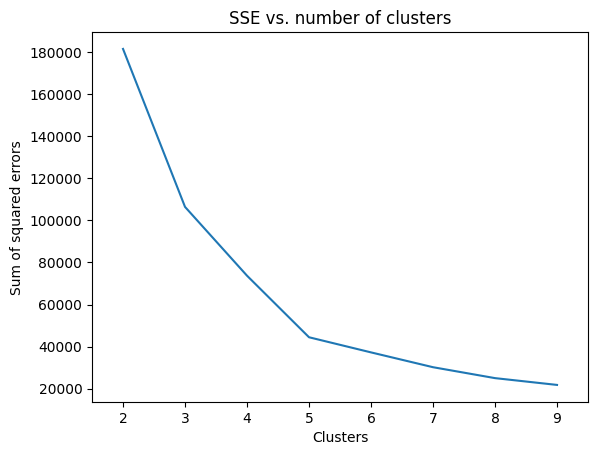

In [19]:
# Check the best number of cluster with any method you like (simple Elbow method is good):
SSE = []
for i in range(2,10):
    km = KMeans(n_clusters = i)
    res=km.fit(features)
    SSE.append(res.inertia_)
print(SSE)

plt.gca()
plt.plot(range(2,10),SSE)
plt.xlabel("Clusters")
plt.ylabel("Sum of squared errors")
plt.title("SSE vs. number of clusters")
plt.xlim(1.5,9.5)
plt.show()

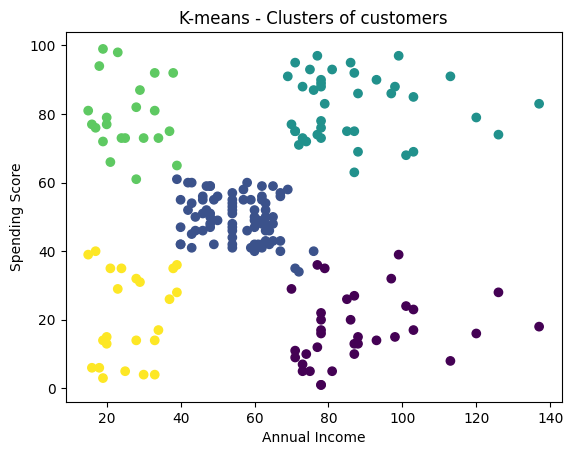

In [20]:
# Plotting clusters

#your code here
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-means - Clusters of customers')
plt.show()

#### b.  Implement a Hierarchical Clustering algorithm (10%)

In [21]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# For Hierarchical Clustering, you can perform Agglomerative Clustering

#your code here
clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clusters_2 = clustering.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


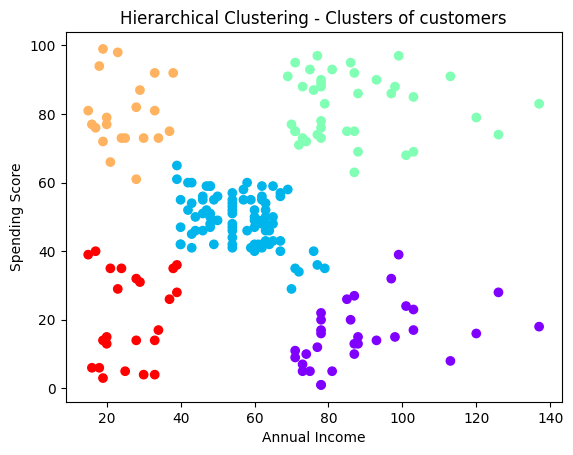

In [23]:
# Plot the clusters (for 2D data)

#your code here
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=clusters_2, cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Hierarchical Clustering - Clusters of customers')
plt.show()

#### c. Evaluate and report clustering quality using silhouette scores (5%).

Silhouette score is a tool for assessing the appropriateness of clustering results by providing a quantitative measure of how well-defined and distinct the clusters are. The Silhouette Score quantifies how well a data point fits into its assigned cluster and how distinct it is from other clusters.

In [24]:
from sklearn.metrics import silhouette_score

# For K-Means

#your code here
score_kmeans = silhouette_score(features, clusters)
print("Silhouette Score for K-Means:", score_kmeans)

# For Hierarchical Model

#your code here
score_h = silhouette_score(features, clusters_2)
print("Silhouette Score for Hierarchical:", score_h)

Silhouette Score for K-Means: 0.553931997444648
Silhouette Score for Hierarchical: 0.5529945955148897


#### d. Discuss which method works the best for this dataset. Elaborate if those methods are good fit for this data (5%).

Method is acceptable but not perfect, only 55% is a silhouette score.